# 2.) DATA PREPOCESSING

PROBLEM STATEMENT:

NASA wants to anaylze that the aestoroid is hazardous or not based on their diameter,relative velocity and distance of aestoroid measured in astronomical units NASA data is as follows:

Inputs:

Relative Velocity km per sec Est Diam(KM) Miss Dist.(Astronomical)

Outputs(label):Binary classification of Hazardous and non Hazardous aestoroid

select (1: Hazardous aesteroid, 0: not Hazardous aestoroid)


In [53]:
#IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [54]:
# READING THE DATASET
dataset=pd.read_csv(r"C:\Users\KUNAL\Documents\aiml\ML project\nasa.csv",encoding='latin-1')
dataset

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
5,3671135,3671135,19.600,0.319562,0.714562,319.561887,714.562102,0.198566,0.444008,1048.431420,...,178.971951,556.160556,0.577800,198.145969,2.069265,2.458009e+06,354.237368,0.647295,J2000,False
6,2495323,2495323,19.600,0.319562,0.714562,319.561887,714.562102,0.198566,0.444008,1048.431420,...,178.971953,556.160544,0.577800,198.145960,2.069265,2.458009e+06,354.237396,0.647295,J2000,False
7,2153315,2153315,19.200,0.384198,0.859093,384.197891,859.092601,0.238729,0.533815,1260.491809,...,112.562984,502.808758,0.680905,288.374651,1.794045,2.458242e+06,186.776932,0.715978,J2000,False
8,2162463,2162463,17.800,0.732074,1.636967,732.073989,1636.967205,0.454890,1.017164,2401.817627,...,80.211132,447.837013,0.872705,353.422394,1.418397,2.458222e+06,182.236432,0.803864,J2000,False
9,2306383,2306383,21.500,0.133216,0.297879,133.215567,297.879063,0.082776,0.185093,437.058960,...,2.613682,299.535161,0.393040,253.765937,1.359211,2.457901e+06,119.861382,1.201862,J2000,True


In [55]:
#Dropping the Redundant and outliner columns
dataset.drop( ['Close Approach Date'], axis = 1, inplace = True)

In [56]:
dataset.drop( ['Orbiting Body'], axis = 1, inplace = True)

In [57]:
dataset.drop( ['Orbit Determination Date'], axis = 1, inplace = True)

In [58]:
dataset.drop( ['Equinox'], axis = 1, inplace = True)


In [59]:
dataset

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True
5,3671135,3671135,19.600,0.319562,0.714562,319.561887,714.562102,0.198566,0.444008,1048.431420,...,17.927751,178.971951,556.160556,0.577800,198.145969,2.069265,2.458009e+06,354.237368,0.647295,False
6,2495323,2495323,19.600,0.319562,0.714562,319.561887,714.562102,0.198566,0.444008,1048.431420,...,17.927748,178.971953,556.160544,0.577800,198.145960,2.069265,2.458009e+06,354.237396,0.647295,False
7,2153315,2153315,19.200,0.384198,0.859093,384.197891,859.092601,0.238729,0.533815,1260.491809,...,34.695127,112.562984,502.808758,0.680905,288.374651,1.794045,2.458242e+06,186.776932,0.715978,False
8,2162463,2162463,17.800,0.732074,1.636967,732.073989,1636.967205,0.454890,1.017164,2401.817627,...,22.215210,80.211132,447.837013,0.872705,353.422394,1.418397,2.458222e+06,182.236432,0.803864,False
9,2306383,2306383,21.500,0.133216,0.297879,133.215567,297.879063,0.082776,0.185093,437.058960,...,2.059577,2.613682,299.535161,0.393040,253.765937,1.359211,2.457901e+06,119.861382,1.201862,True


In [60]:
#UNIVARATE SELECTION-Dividing the dataset into dependent and independant variables
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [61]:
X

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395
5,3671135,3671135,19.600,0.319562,0.714562,319.561887,714.562102,0.198566,0.444008,1048.431420,...,1.323532,17.927751,178.971951,556.160556,0.577800,198.145969,2.069265,2.458009e+06,354.237368,0.647295
6,2495323,2495323,19.600,0.319562,0.714562,319.561887,714.562102,0.198566,0.444008,1048.431420,...,1.323532,17.927748,178.971953,556.160544,0.577800,198.145960,2.069265,2.458009e+06,354.237396,0.647295
7,2153315,2153315,19.200,0.384198,0.859093,384.197891,859.092601,0.238729,0.533815,1260.491809,...,1.237475,34.695127,112.562984,502.808758,0.680905,288.374651,1.794045,2.458242e+06,186.776932,0.715978
8,2162463,2162463,17.800,0.732074,1.636967,732.073989,1636.967205,0.454890,1.017164,2401.817627,...,1.145551,22.215210,80.211132,447.837013,0.872705,353.422394,1.418397,2.458222e+06,182.236432,0.803864
9,2306383,2306383,21.500,0.133216,0.297879,133.215567,297.879063,0.082776,0.185093,437.058960,...,0.876125,2.059577,2.613682,299.535161,0.393040,253.765937,1.359211,2.457901e+06,119.861382,1.201862


In [62]:
Y

0        True
1       False
2        True
3       False
4        True
5       False
6       False
7       False
8       False
9        True
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22       True
23      False
24      False
25       True
26      False
27       True
28      False
29      False
        ...  
4657    False
4658    False
4659    False
4660    False
4661    False
4662     True
4663     True
4664    False
4665     True
4666    False
4667    False
4668     True
4669    False
4670    False
4671    False
4672    False
4673    False
4674     True
4675    False
4676    False
4677    False
4678    False
4679    False
4680    False
4681    False
4682    False
4683    False
4684    False
4685    False
4686    False
Name: Hazardous, Length: 4687, dtype: bool

In [12]:
#LABEL ENCODING- Converting the independant variable into Binary form
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [13]:
Y

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [14]:
#apply SelectKBest class to extract top 10 best features
#1.) UNIVARIATE METHOD
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)

In [15]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [16]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [17]:
featureScores
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                          Specs         Score
11    Epoch Date Close Approach  9.737450e+11
17       Miss Dist.(kilometers)  6.094849e+07
18            Miss Dist.(miles)  3.787163e+07
0              Neo Reference ID  3.119308e+07
1                          Name  3.119308e+07
13  Relative Velocity km per hr  2.366953e+06
14               Miles per hour  1.470733e+06
10         Est Dia in Feet(max)  4.024342e+05
9          Est Dia in Feet(min)  1.799741e+05
6             Est Dia in M(max)  1.226619e+05


In [18]:
#2.) By Correlation matrix
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [19]:
corrmat

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
Neo Reference ID,1.000000,1.000000,0.602381,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,...,-0.175461,-0.026381,0.040058,0.130486,-0.007669,0.006318,0.003031,-0.051685,-0.020719,-0.269028
Name,1.000000,1.000000,0.602381,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,...,-0.175461,-0.026381,0.040058,0.130486,-0.007669,0.006318,0.003031,-0.051685,-0.020719,-0.269028
Absolute Magnitude,0.602381,0.602381,1.000000,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,...,-0.459632,-0.011470,-0.206774,0.086966,0.031784,-0.256169,-0.115855,-0.049401,0.195652,-0.325522
Est Dia in KM(min),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in KM(max),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in M(min),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in M(max),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Miles(min),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Miles(max),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Feet(min),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424


In [63]:
dataset.drop(dataset.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]],axis=1, inplace = True)


In [64]:
dataset

,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Hazardous
0,0.127220,6.115834,0.419483,True
1,0.146068,18.113985,0.383014,False
2,0.231502,7.590711,0.050956,True
3,0.008801,11.173874,0.285322,False
4,0.127220,9.840831,0.407832,True
5,0.319562,10.808844,0.392785,False
6,0.319562,10.808842,0.392783,False
7,0.384198,24.421884,0.129179,False
8,0.732074,17.373784,0.358283,False
9,0.133216,12.899610,0.151806,True


In [77]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [78]:
X

,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical)
0,0.127220,6.115834,0.419483
1,0.146068,18.113985,0.383014
2,0.231502,7.590711,0.050956
3,0.008801,11.173874,0.285322
4,0.127220,9.840831,0.407832
5,0.319562,10.808844,0.392785
6,0.319562,10.808842,0.392783
7,0.384198,24.421884,0.129179
8,0.732074,17.373784,0.358283
9,0.133216,12.899610,0.151806


In [79]:
Y

0        True
1       False
2        True
3       False
4        True
5       False
6       False
7       False
8       False
9        True
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22       True
23      False
24      False
25       True
26      False
27       True
28      False
29      False
        ...  
4657    False
4658    False
4659    False
4660    False
4661    False
4662     True
4663     True
4664    False
4665     True
4666    False
4667    False
4668     True
4669    False
4670    False
4671    False
4672    False
4673    False
4674     True
4675    False
4676    False
4677    False
4678    False
4679    False
4680    False
4681    False
4682    False
4683    False
4684    False
4685    False
4686    False
Name: Hazardous, Length: 4687, dtype: bool

"from sklearn.preprocessing import Imputer\nimputer = SimpleImputer(missing_values=np.nan, strategy='mean')\nimputer = imputer.fit(X.iloc[:, 1:])\nX.iloc[:, 1:] = imputer.transform(X.iloc[:, 1:])#call \n#load input training data transform using a model\n#fit_transform"

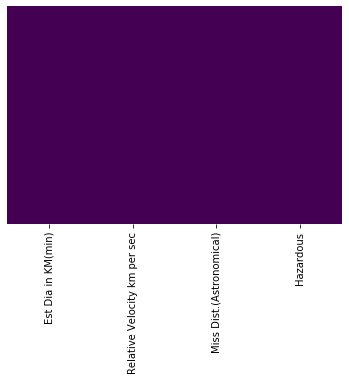

In [80]:
#Checking for missing value
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#FILLING THE MISSING VALUE
'''from sklearn.preprocessing import Imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X.iloc[:, 1:])
X.iloc[:, 1:] = imputer.transform(X.iloc[:, 1:])#call 
#load input training data transform using a model
#fit_transform'''

In [81]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [82]:
Y

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [83]:
# Splitting the dataset into Training and Testing Dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=22)

In [84]:
# Scaling the independant variables by Standardization 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:
X_train

array([[-0.42851563, -0.48028473,  0.84627541],
       [-0.1510435 ,  0.5693382 ,  0.86268894],
       [ 0.57043418,  0.81640622,  1.65026131],
       ...,
       [-0.292366  ,  0.46255447,  1.30718212],
       [ 0.30380213,  1.63351255,  0.21104374],
       [-0.40120641, -0.14891932, -1.04815048]])

In [86]:
X_test

array([[ 0.92192368,  0.43778403, -0.01455257],
       [ 0.26609541,  0.06788685,  0.23114665],
       [ 0.38463052, -0.12712133, -0.75159171],
       ...,
       [ 0.04562146, -0.21359799, -0.77897848],
       [-0.47329458, -0.69785325, -1.58787418],
       [-0.13299593,  0.275145  ,  0.89981662]])

In [100]:
#Use of PCA for feature selection
from sklearn.decomposition import PCA


pca = PCA(n_components = 3)
fit = pca.fit_transform(X)
pca.explained_variance_ratio_
#fit.explained_variance_ratio_

array([9.97241129e-01, 2.41493950e-03, 3.43931378e-04])

In [101]:
pre=pd.DataFrame(data=Y,columns=['hazardous'])
pre





,hazardous
0,1
1,0
2,1
3,0
4,1
5,0
6,0
7,0
8,0
9,1


In [102]:
principalDf=pd.DataFrame(data=fit,columns=['principal component 1','principal component 2','principal component 3'])
principalDf

,principal component 1,principal component 2,principal component 3
0,-7.853996,0.030136,-0.216714
1,4.142926,-0.104487,-0.102465
2,-6.380576,0.097169,0.166026
3,-2.798863,-0.158766,-0.056261
4,-4.129455,-0.017520,-0.181210
5,-3.159279,0.161578,-0.150322
6,-3.159282,0.161578,-0.150320
7,10.451335,0.040890,0.203421
8,3.409833,0.488850,-0.053086
9,-1.072710,-0.063018,0.094390


In [103]:
finalDf=pd.concat([principalDf,pre],axis=1)
finalDf

,principal component 1,principal component 2,principal component 3,hazardous
0,-7.853996,0.030136,-0.216714,1
1,4.142926,-0.104487,-0.102465,0
2,-6.380576,0.097169,0.166026,1
3,-2.798863,-0.158766,-0.056261,0
4,-4.129455,-0.017520,-0.181210,1
5,-3.159279,0.161578,-0.150322,0
6,-3.159282,0.161578,-0.150320,0
7,10.451335,0.040890,0.203421,0
8,3.409833,0.488850,-0.053086,0
9,-1.072710,-0.063018,0.094390,1


In [ ]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)


HAzardous=['True','False']
colors=['r','b']
for HAzardous,color in zip(hazardous,colors):
    indicesTokeep=finalDf['hazardous']==hazardous
    ax.scatter(finalDf.loc[indicesTokeep,'principal component 1'],
    finalDf.loc[indicesTokeep,'principal component 2'],c=color,s=50)
    
ax.grid()

FROM PCA we came to know that the maximum variance(information of the dataset) lie btw principle component 1 and principal component 2

In [104]:
# Check of realtionship between Features- removing those having relationship more than 0.4 would be deleted
multicolinearity_check = X.corr()


In [105]:
X.corr()

,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical)
Est Dia in KM(min),1.000000,0.242141,0.188027
Relative Velocity km per sec,0.242141,1.000000,0.351694
Miss Dist.(Astronomical),0.188027,0.351694,1.000000


Since there no values higher than 0.4 so we don't delete any feature 